![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sqlite3
from pandasql import sqldf 
pysqldf = lambda q: sqldf(q, globals())

In [2]:
conn = sqlite3.Connection(r'C:\Users\Patrick Parkinson\Documents\Flatiron\Projects\Project 1\Working_Repository\Movie-Analysis\zippedData\SQL_data\im.db')

In [3]:
#Describe initial strategy...data overview, variable and dataset justification

q = """
SELECT *
FROM movie_basics
JOIN movie_ratings
  USING(movie_id)

"""

basic_rate_df = pd.read_sql(q, conn)
basic_rate_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [4]:
#highlight missing values...why we can do join first

basic_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [5]:
budget_gross_df = pd.read_csv(r'C:\Users\Patrick Parkinson\Documents\Flatiron\Projects\Project 1\Working_Repository\Movie-Analysis\zippedData\tn.movie_budgets.csv.gz')
budget_gross_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#No missing values, lets join

budget_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
#Check what to join on....Primary title and original title only seem to differ when original title in different language

basic_rate_df[basic_rate_df.primary_title != basic_rate_df.original_title]


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
12,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
...,...,...,...,...,...,...,...,...
73804,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50
73824,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301
73829,tt9899840,Auntie Frog,Khaleh Ghurbagheh,2018,81.0,"Adventure,Comedy,Family",6.2,6
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,"Drama,Thriller",4.9,14


In [8]:
#go ahead and merge to see how much overlap

br_inc_merged = basic_rate_df.merge(budget_gross_df, how='inner', left_on='primary_title', right_on='movie')
print(len(br_inc_merged))
br_inc_merged.head()

2875


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015,79.0,"Comedy,Mystery",6.1,14828,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"


In [9]:
#none to drop now

br_inc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   int64  
 8   id                 2875 non-null   int64  
 9   release_date       2875 non-null   object 
 10  movie              2875 non-null   object 
 11  production_budget  2875 non-null   object 
 12  domestic_gross     2875 non-null   object 
 13  worldwide_gross    2875 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 336.9+ KB


In [10]:
#make sure there's nothing we can do to help yield more data points

pd.set_option('display.max_rows', 10000)
basic_rate_pt = basic_rate_df['primary_title'].copy()

budget_gross_pt = budget_gross_df['movie'].copy()

pt_concat = pd.concat([basic_rate_pt, budget_gross_pt])
# print(len(pt_concat))

pt_concat.drop_duplicates(inplace=True)
# print(len(pt_concat))

pt_concat.sort_values(ascending=True, inplace=True)
# print(len(pt_concat))

print(pt_concat.iloc[10000: 20000])

1594                                           Bodhisattva
43551                                               Bodhon
57376                                               Bodied
25915                                               Bodies
69044                                       Bodies at Rest
53953                                           Bodkin Ras
61911                                                 Bodo
38546                                                Bodom
7135                                                  Body
13907                                        Body Complete
3640                                           Body Double
61950                                        Body Electric
53643                                            Body Farm
21290                               Body Fat Index of Love
24422                                            Body High
39719                                         Body Keepers
13369                                        Body Langua

To do: 
 - Maybe include more of the work you did on opening other datasets

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

Data Prep Plan:
 - Building ERD DataFrame (maybe some prelim analysis)
 - Evaluate DF - check against outside DF
 - Combine / Analyze / Visualize

Data Cleaning / Feature Engineering

In [11]:
#run once to remove $ signs and change dollar amounts to int
br_inc_merged['production_budget'] = br_inc_merged['production_budget'].str.replace(r'[^\w\s]+', '').astype('int64')
br_inc_merged['domestic_gross'] = br_inc_merged['domestic_gross'].str.replace(r'[^\w\s]+', '').astype('int64')
br_inc_merged['worldwide_gross'] = br_inc_merged['worldwide_gross'].str.replace(r'[^\w\s]+', '').astype('int64')



In [12]:
#assume that this is the actual income...budget is actually what was spent

br_inc_merged['domestic_income'] = br_inc_merged['domestic_gross'] - br_inc_merged['production_budget']
br_inc_merged['worldwide_income'] = br_inc_merged['worldwide_gross'] - br_inc_merged['production_budget']

In [13]:
br_inc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   int64  
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   int64  
 8   id                 2875 non-null   int64  
 9   release_date       2875 non-null   object 
 10  movie              2875 non-null   object 
 11  production_budget  2875 non-null   int64  
 12  domestic_gross     2875 non-null   int64  
 13  worldwide_gross    2875 non-null   int64  
 14  domestic_income    2875 non-null   int64  
 15  worldwide_income   2875 non-null   int64  
dtypes: float64(2), int64(8),

In [14]:
genre_df = br_inc_merged.copy()

In [15]:
genre_df['genres'] = genre_df['genres'].str.split(',')

In [16]:
genre_df = genre_df.explode('genres')
genre_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Animation,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Comedy,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294
1,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",The Overnight,200000,1109808,1165996,909808,965996
2,tt3844362,The Overnight,The Overnight,2015,79.0,Comedy,6.1,14828,21,"Jun 19, 2015",The Overnight,200000,1109808,1165996,909808,965996


In [17]:
#TESTS 



(0.0, 200.0)

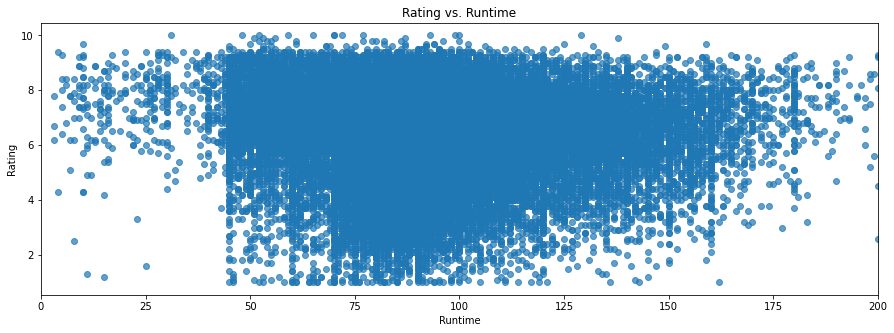

In [18]:
#Rating vs Runtime: Full Dataset

#Finding: Certain runtimes not included in budget analysis

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(basic_rate_df['runtime_minutes'], basic_rate_df['averagerating'], alpha = .7)
ax.set_title('Rating vs. Runtime')
ax.set_xlabel('Runtime')
ax.set_ylabel('Rating')

plt.xlim(0, 200)

Questions to explore
- do longer movies cost more? Larger budgets? Maybe there is a sweet spot for where to generate best income

## Analysis
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

EDA

There a way I can get all this describe data to show up in a single table????

In [19]:
br_inc_merged['averagerating'].describe()

count    2875.000000
mean        6.249217
std         1.185992
min         1.600000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.300000
Name: averagerating, dtype: float64

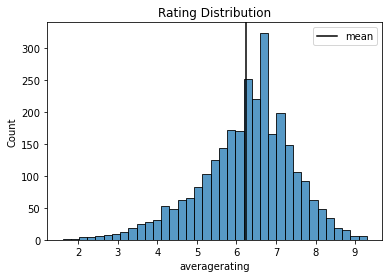

In [20]:
g = sns.histplot(data=br_inc_merged['averagerating'])
g.set(title='Rating Distribution')
# g.axvline(x=br_inc_merged['averagerating'].mean(), color='black', label=str(np.mean(br_inc_merged['averagerating'])))
g.axvline(x=br_inc_merged['averagerating'].mean(), color='black', label='mean')
g.legend(loc='upper right')

In [21]:
br_inc_merged['production_budget'].describe()

count    2.875000e+03
mean     3.436427e+07
std      4.774360e+07
min      1.400000e+03
25%      5.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

In [66]:
br_inc_merged['production_budget'].median()

17000000.0

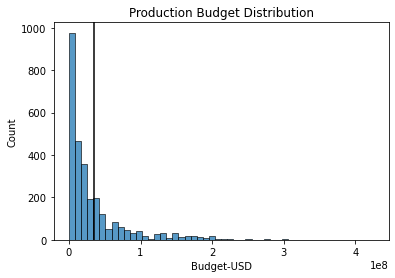

In [22]:

g = sns.histplot(data=br_inc_merged['production_budget'], bins=50)
g.set(title='Production Budget Distribution', xlabel='Budget-USD');
# g.set(xlim = (-0, 20000000))
g.axvline(x=br_inc_merged['production_budget'].mean(), color='black')

C:\Users\Patrick Parkinson\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


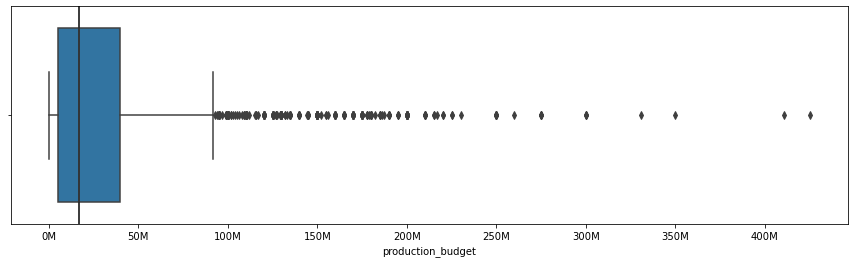

In [69]:
ax, fig = plt.subplots(figsize=(15,4))
g = sns.boxplot(br_inc_merged['production_budget']);
g.set_xticks(range(0, 450000000, 50000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000];
g.set_xticklabels(xlabels);

g.axvline(x=17000000.0, color='black')

C:\Users\Patrick Parkinson\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


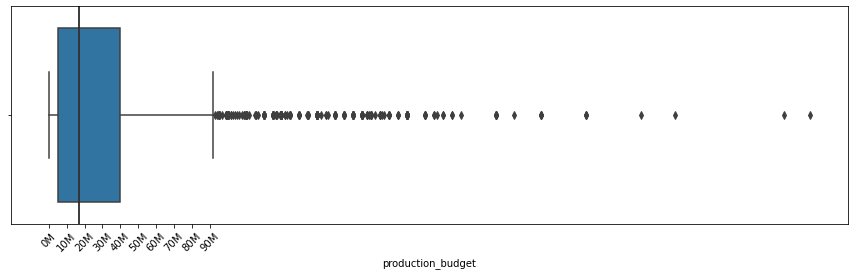

In [73]:
ax, fig = plt.subplots(figsize=(15,4))
g = sns.boxplot(br_inc_merged['production_budget']);
g.set_xticks(range(0, 100000000, 10000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000];
g.set_xticklabels(xlabels, rotation=45);

g.axvline(x=17000000.0, color='black')


In [23]:
br_inc_merged['worldwide_income'].describe()

count    2.875000e+03
mean     6.854877e+07
std      1.692569e+08
min     -2.002376e+08
25%     -2.456700e+06
50%      9.650000e+06
75%      6.307396e+07
max      2.351345e+09
Name: worldwide_income, dtype: float64

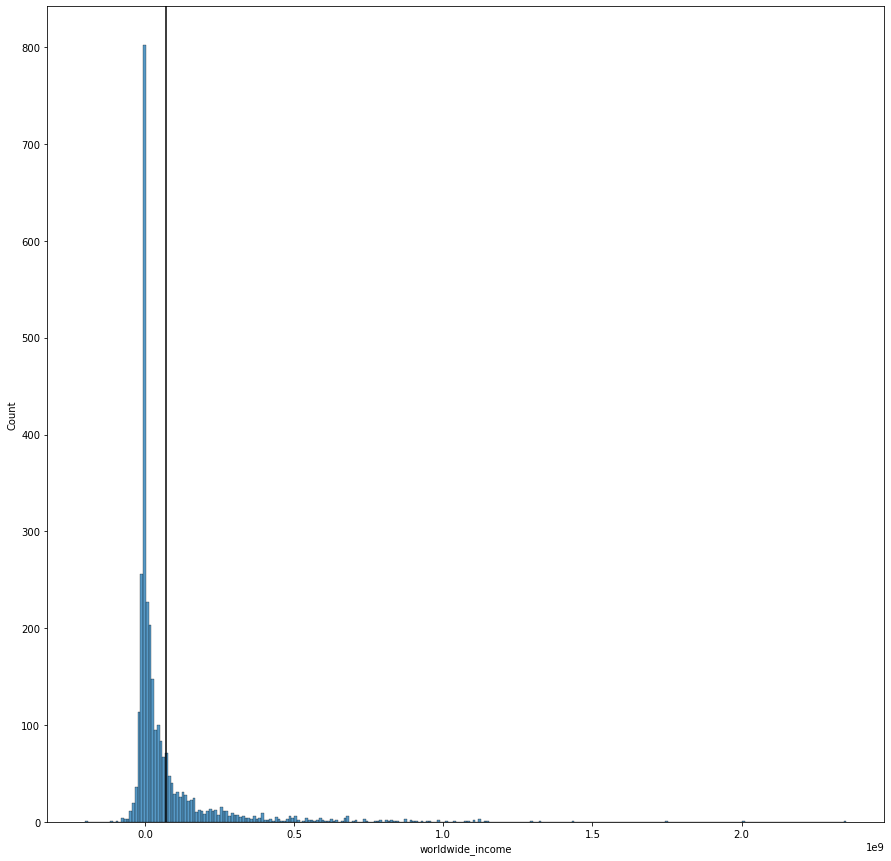

In [24]:
#show one zoomed out, one zoomed in 


fig,ax = plt.subplots(figsize=(15,15))
g = sns.histplot(ax=ax, data=br_inc_merged['worldwide_income'])
# g.set(xlim = (-200000000, 250000000))
# xlabels = ['{:,.2f}'.format(x) + 'K' for x in g.get_xticks()/1000]
# g.set_xticklabels(xlabels)

# plt.ticklabel_format(style='plain', axis='x')

g.axvline(x=br_inc_merged['worldwide_income'].mean(), color='black')


In [25]:
br_inc_merged['runtime_minutes'].describe()

count    2757.000000
mean      102.945956
std        20.788982
min         3.000000
25%        90.000000
50%       101.000000
75%       113.000000
max       280.000000
Name: runtime_minutes, dtype: float64

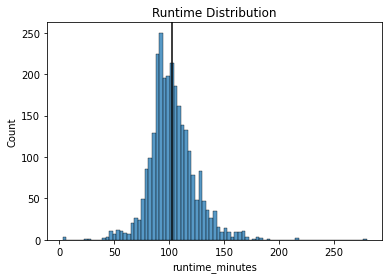

In [26]:
g=sns.histplot(data=br_inc_merged['runtime_minutes'])
g.set(title='Runtime Distribution')
g.axvline(x=br_inc_merged['runtime_minutes'].mean(), color='black')

Analysis

Worldwide income vs. rating
5 - 9 rating range most income...potential highlight on 5 - 9, above black line. Note there movies across the 
full range of ratings without high income 

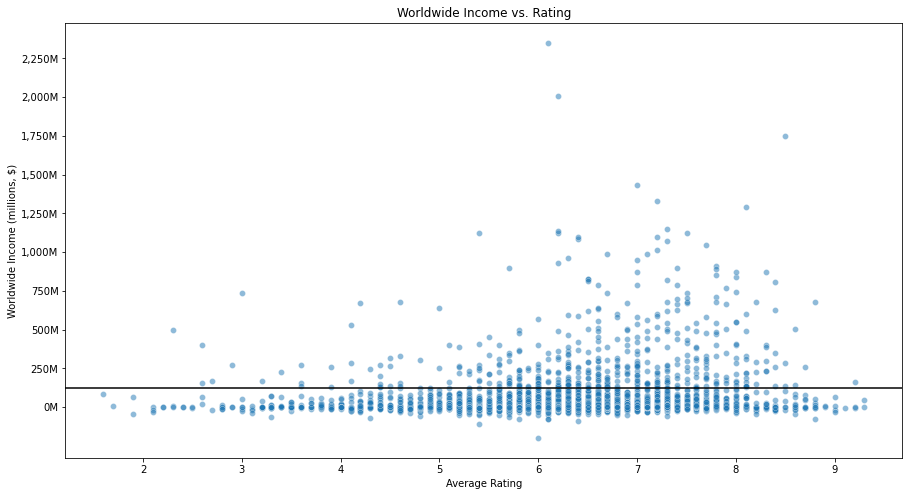

In [57]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.scatterplot(ax=ax, x=br_inc_merged['averagerating'], y=br_inc_merged['worldwide_income'], alpha=.5);
g.set(title='Worldwide Income vs. Rating', xlabel='Average Rating', ylabel='Worldwide Income (millions, $)')
g.set_yticks(range(0, 2500000000, 250000000))

ylabels = ['{:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
g.axhline(y=(1/2)*250000000, color='black')

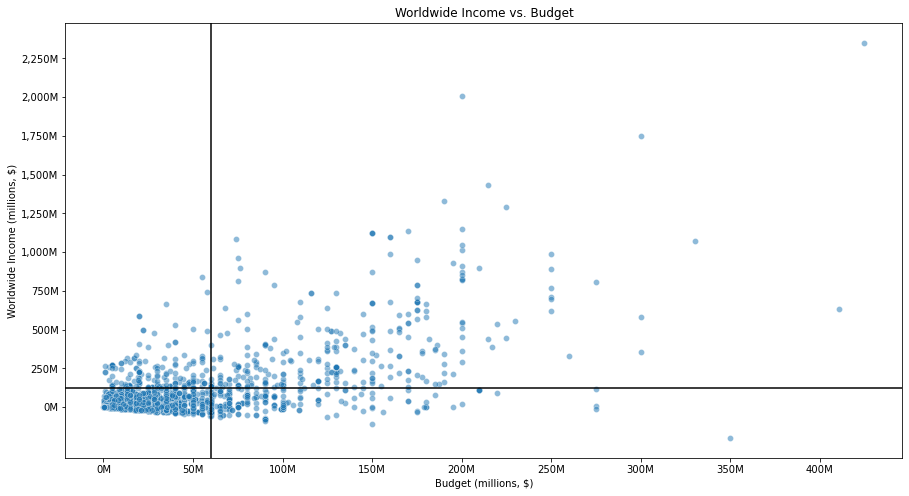

In [61]:
fig, ax = plt.subplots(figsize=(15,8))
g = sns.scatterplot(ax=ax, x=br_inc_merged['production_budget'], y=br_inc_merged['worldwide_income'], alpha=.5);
g.set(title='Worldwide Income vs. Budget', xlabel='Budget (millions, $)', ylabel='Worldwide Income (millions, $)')

g.set_xticks(range(0, 450000000, 50000000))
xlabels = ['{:,.0f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)

g.set_yticks(range(0, 2500000000, 250000000))
ylabels = ['{:,.0f}'.format(y) + 'M' for y in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)


g.axhline(y=(1/2)*250000000, color='black')
g.axvline(x=60000000, color='black')

Worldwide income vs budget
- both high and low incomes across the board
- most of movies in 0 to 60M budget make <=125M (covers more than 75% of movies per EDA)
--->doesn't seem to be big range in difference in income based in range from 0 to 60M... ANALYZE THIS
- less movies above 60M but once you get to this point there are more > 125M

Additional work
- group into low (<30), medium (30 to 60), and high budget (60 - 200M...cut out outliers)....take averages...especially in low and medium groups
- maybe graph zoomed in versions?


In [ ]:
# br_inc_merged['Budget_Range'] = 

In [ ]:
br_inc_merged[br_inc_merged['worldwide_income']]

************************EXPLORATORY***************************

In [11]:
#Movie_basics + Movie_ratings

#Before combining w/people, likely need to fix missing values

q1 = """
SELECT *
FROM movie_basics
JOIN movie_ratings
  USING(movie_id)

"""

base_rate_df = pd.read_sql(q1, conn)
base_rate_df.head()




,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [12]:
base_rate_df.info()
#missing several runtime_minutes
#mising 4 genres

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [13]:
#MOVIE_BASICS, MOVIE_RATINGS, PRINCIPALS

#Question: can I create a DF, modify it, and then join it w/SQL DF? -> yes, just make them both DF's and then combine

q2 = """
SELECT *
FROM movie_ratings
JOIN movie_basics
  USING(movie_id)
JOIN principals
  USING(movie_id)


"""

base_rate_prin_df = pd.read_sql(q2, conn)
base_rate_prin_df.head()




,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,person_id,category,job,characters
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,1,nm4718369,actor,None,"[""Sukh""]"
1,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,2,nm10007357,actress,None,"[""Raunak""]"
2,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,3,nm8743259,actress,None,"[""Jaanpreet""]"
3,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,4,nm3760302,actor,None,"[""Garry Randhawa""]"
4,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,5,nm8353804,director,None,None


In [16]:
base_rate_prin_df.groupby('primary_title').mean()

,averagerating,numvotes,start_year,runtime_minutes,ordering
primary_title,,,,,
!Women Art Revolution,6.9,196.0,2010.0,83.0,1.0
#1 Serial Killer,5.6,40.0,2013.0,87.0,5.5
#5,6.8,6.0,2013.0,68.0,1.5
#66,5.3,18.0,2015.0,116.0,5.5
#ALLMYMOVIES,8.3,21.0,2015.0,NaN,2.0
...,...,...,...,...,...
Üç Harflilerin Musallat Oldugu Büyülü Konakta Ruh Çagiran Gençlerin Hazin Hikayesi,4.8,51.0,2018.0,80.0,5.5
"Üç, Iki, Bir... Kestik!",4.3,88.0,2014.0,92.0,4.0
à propos: philosophie,8.2,5.0,2016.0,80.0,3.5


In [8]:
base_rate_prin_df['category'].value_counts()

actor                  155567
actress                 92875
producer                80367
director                77452
writer                  52412
composer                49898
cinematographer         46652
self                    32921
editor                  32428
production_designer      7038
archive_footage          2133
archive_sound              12
Name: category, dtype: int64

In [9]:
#BOM MOVIE GROSS
movie_gross_df = pd.read_csv(r'C:\Users\Patrick Parkinson\Documents\Flatiron\Projects\Project 1\Working_Repository\Movie-Analysis\zippedData\bom.movie_gross.csv.gz')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
movie_gross_df['title'].value_counts()

Bluebeard             2
Lights Out            1
Lean on Pete          1
Molly's Game          1
All Is Lost           1
                     ..
The Red Baron         1
Wadjda (U.S. only)    1
Concussion (2015)     1
Against the Sun       1
The Grandmaster       1
Name: title, Length: 3386, dtype: int64

In [11]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [12]:
#MOVIE BUDGETS

movie_budget_df = pd.read_csv(r'C:\Users\Patrick Parkinson\Documents\Flatiron\Projects\Project 1\Working_Repository\Movie-Analysis\zippedData\tn.movie_budgets.csv.gz')
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


DATA PREP START

In [14]:
q1 = """
SELECT *
FROM movie_basics
JOIN movie_ratings
  USING(movie_id)

"""

base_rate_df = pd.read_sql(q1, conn)
base_rate_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [15]:
base_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [16]:
base_rate_df.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [17]:
base_rate_df[base_rate_df.genres.isna()]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
18,tt0253093,Gangavataran,Gangavataran,2018,134.0,None,6.6,8
29,tt0306058,Second Coming,Second Coming,2012,95.0,None,5.5,20
33,tt0326592,The Overnight,The Overnight,2010,88.0,None,7.5,24
37,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,None,6.2,10
38,tt0330987,"Tiden är en dröm, del 2","Tiden är en dröm, del 2",2014,109.0,None,6.3,6
...,...,...,...,...,...,...,...,...
73644,tt9742106,The Cat in Their Arms,Neko wa Daku Mono,2018,NaN,None,4.5,8
73752,tt9828428,Anjali CBI,Anjali CBI,2019,NaN,None,7.6,20
73798,tt9866736,Rise: Ini Kalilah,Rise: Ini Kalilah,2018,NaN,None,5.8,11
73805,tt9876160,Koridor bessmertiya,Koridor bessmertiya,2019,125.0,None,5.4,45


In [18]:
base_rate_df[base_rate_df.runtime_minutes.isna()]
#MAYBE ONLY TAKE OUT RUNTIME MINUTES WHEN YOU'RE ANALYZING THAT CATEGORY???

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
17,tt0250404,Godfather,Godfather,2012,NaN,"Crime,Drama",6.7,236
21,tt0263814,On kadin,On kadin,2019,NaN,Drama,7.1,100
26,tt0285423,Abolição,Abolição,2019,NaN,Documentary,7.4,35
...,...,...,...,...,...,...,...,...
73828,tt9899290,Band Together with Logic,Band Together with Logic,2019,NaN,Documentary,8.7,10
73830,tt9899850,The Agitation,Ashoftegi,2019,NaN,"Drama,Thriller",4.9,14
73844,tt9905796,July Kaatril,July Kaatril,2019,NaN,Romance,9.0,5
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [19]:
base_rate_df.dropna(inplace = True)
base_rate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [20]:
merged_budget = base_rate_df.merge(movie_budget_df, how='inner', left_on='primary_title', right_on='movie')
print(len(merged_budget))
merged_budget.head()

2752


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"


In [21]:
merged_gross = base_rate_df.merge(movie_gross_df, how='inner', left_on='primary_title', right_on='title')
print(len(merged_gross))

2975


TRY LEFT MERGE, JOINED SERIES...TEST IF TITLE MANIPULATION FEASIBLE

In [173]:
merged_budget_o = base_rate_df.merge(movie_budget_df, how='outer', left_on='primary_title', right_on='movie')
print(len(merged_budget_o))



69464


ValueError: Length mismatch: Expected axis has 14 elements, new values have 3 elements

In [226]:
merged_budget_o['test_col'] = False

In [235]:
merged_budget_o.head()

for value in merged_budget_o['genres']:
    if value != merged_budget_o['test_col']:
        merged_budget_o['test_col'] = 1
    

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [57]:
merged_budget_o[merged_budget_o.movie.notnull()]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
14,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",1.9,8248.0,26.0,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
32,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886.0,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
33,tt4339118,On the Road,On the Road,2014.0,89.0,Drama,6.0,6.0,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
34,tt5647250,On the Road,On the Road,2016.0,121.0,Drama,5.7,127.0,17.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
39,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013.0,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37.0,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
69460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
69461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.0,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
69462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [99]:
pd.set_option('display.max_rows', 10000)
base_rate_pt = base_rate_df['primary_title'].copy()

movie_budget_pt = movie_budget_df['movie'].copy()

# print(base_rate_pt)

# print(len(base_rate_pt))
# print(len(movie_budget_pt))

# result = pd.concat([base_rate_pt, movie_budget_pt])
# print(len(result))

result.sort_values(ascending=True, inplace=True)

# result

print(result.iloc[10000: 20000])



47091                                            Bostonian
29147                                                 Bota
49079                                      Botanical Books
69448                                               Botero
43467                          Boteti: The Returning River
65897                                               Botoks
10267                                            Bots High
5366                                                 Botso
50847                                           Botticelli
59279                                 Botticelli - Inferno
4362                                         Bottle Rocket
4341                                          Bottle Shock
49056                                            Bottle Up
16425           Bottled Life: Nestle's Business with Water
16941                                           Bottled Up
31512         Bottled Up: The Battle Over Dublin Dr Pepper
11383                                               Bott

CHECK IF WE CAN JOIN BY ORIGINAL TITLE -> NO THESE ARE LIKELY ALL JUST REPEATS

In [59]:
merged_budget_orig_title = base_rate_df.merge(movie_budget_df, how='inner', left_on='original_title', right_on='movie')
print(len(merged_budget_orig_title))
#this plus matches from primary 

2530


In [60]:
base_rate_df[base_rate_df.primary_title != base_rate_df.original_title]
#Primary title and original title only seem to differ when original title in different language

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
12,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
...,...,...,...,...,...,...,...,...
73785,tt9859504,Men of Hard Skin,Hombres de piel dura,2019,96.0,Drama,5.3,25
73804,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50
73824,tt9894394,Upin & Ipin: The Lone Gibbon Kris,Upin & Ipin: Keris Siamang Tunggal,2019,100.0,Animation,8.1,301
73829,tt9899840,Auntie Frog,Khaleh Ghurbagheh,2018,81.0,"Adventure,Comedy,Family",6.2,6


MOVIE_BUDGET DF VS. BUDGET/GROSS


In [22]:
merged_budget.head()
# merged_budget.isna().sum()
merged_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2752 non-null   object 
 1   primary_title      2752 non-null   object 
 2   original_title     2752 non-null   object 
 3   start_year         2752 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2752 non-null   object 
 6   averagerating      2752 non-null   float64
 7   numvotes           2752 non-null   int64  
 8   id                 2752 non-null   int64  
 9   release_date       2752 non-null   object 
 10  movie              2752 non-null   object 
 11  production_budget  2752 non-null   object 
 12  domestic_gross     2752 non-null   object 
 13  worldwide_gross    2752 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 322.5+ KB


In [27]:
merged_budget['production_budget'] = merged_budget['production_budget'].str.replace(r'[^\w\s]+', '').astype('int64')
# merged_budget['domestic_gross'] = merged_budget['domestic_gross'].str.replace(r'[^\w\s]+', '').astype('int64')
# merged_budget['worldwide_gross'] = merged_budget['worldwide_gross'].str.replace(r'[^\w\s]+', '').astype('int64')

In [28]:
merged_budget.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,25000000,720828,9313302
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,25000000,720828,9313302
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",On the Road,25000000,720828,9313302
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183


In [29]:
merged_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2752 non-null   object 
 1   primary_title      2752 non-null   object 
 2   original_title     2752 non-null   object 
 3   start_year         2752 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2752 non-null   object 
 6   averagerating      2752 non-null   float64
 7   numvotes           2752 non-null   int64  
 8   id                 2752 non-null   int64  
 9   release_date       2752 non-null   object 
 10  movie              2752 non-null   object 
 11  production_budget  2752 non-null   int64  
 12  domestic_gross     2752 non-null   int64  
 13  worldwide_gross    2752 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 322.5+ KB


In [30]:
merged_budget['domestic_income'] = merged_budget['domestic_gross'] - merged_budget['production_budget']
merged_budget['worldwide_income'] = merged_budget['worldwide_gross'] - merged_budget['production_budget']

print(len(merged_budget))
merged_budget.head()


2752


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,-32763162,96861183


In [31]:
merged_budget['worldwide_income'].describe()

count    2.752000e+03
mean     6.965094e+07
std      1.682778e+08
min     -2.002376e+08
25%     -2.300000e+06
50%      9.873828e+06
75%      6.612770e+07
max      2.351345e+09
Name: worldwide_income, dtype: float64

In [32]:
merged_budget['domestic_income'].describe()

count    2.752000e+03
mean     8.847740e+06
std      5.234489e+07
min     -3.072376e+08
25%     -1.048733e+07
50%     -9.965650e+05
75%      1.622862e+07
max      5.000596e+08
Name: domestic_income, dtype: float64

In [33]:
merged_budget['worldwide_income'].value_counts()

-500000      20
-1000000     17
-2000000     17
-250000      14
-3000000     12
             ..
 78957098     1
-498222       1
 11190831     1
-1192497      1
 25493506     1
Name: worldwide_income, Length: 2022, dtype: int64

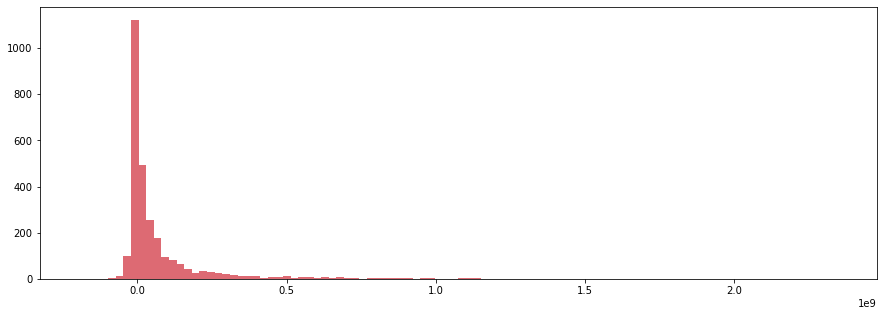

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(x = merged_budget['worldwide_income'], bins = 100, alpha = .3);
ax.hist(x = merged_budget['worldwide_income'], bins = 100, color = 'r', alpha = .5);

Text(0, 0.5, 'Worldwide Income')

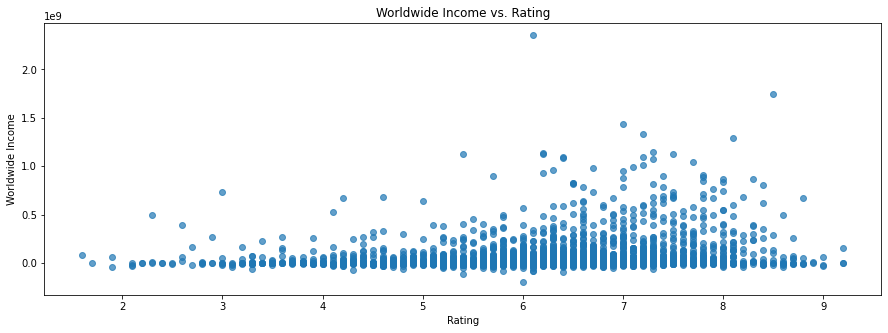

In [157]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['averagerating'], merged_budget['worldwide_income'], alpha = .7)
ax.set_title('Worldwide Income vs. Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Worldwide Income')

#Movies w/ratings 6 and above make the most, although there are plenty of highly rated movies that don't make more money

Text(0, 0.5, 'Worldwide Income')

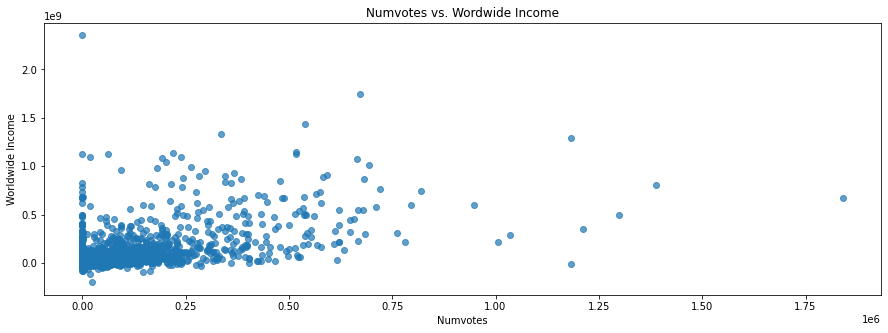

In [148]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['numvotes'], merged_budget['worldwide_income'], alpha = .7)
ax.set_title('Numvotes vs. Wordwide Income')
ax.set_xlabel('Numvotes')
ax.set_ylabel('Worldwide Income')

Text(0, 0.5, 'Rating')

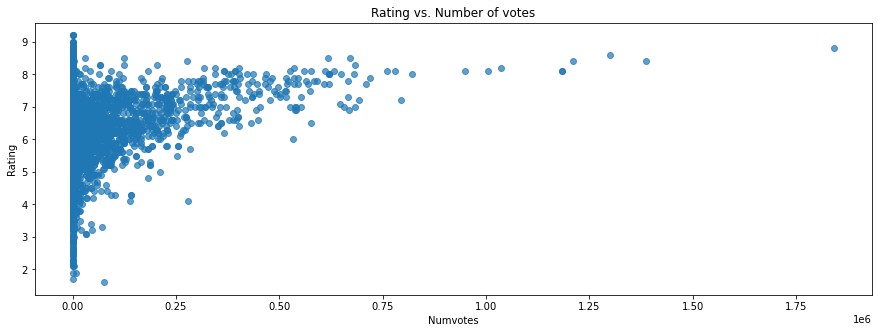

In [149]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['numvotes'], merged_budget['averagerating'], alpha = .7)
ax.set_title('Rating vs. Number of votes')
ax.set_xlabel('Numvotes')
ax.set_ylabel('Rating')

Text(0, 0.5, 'Worldwide Income')

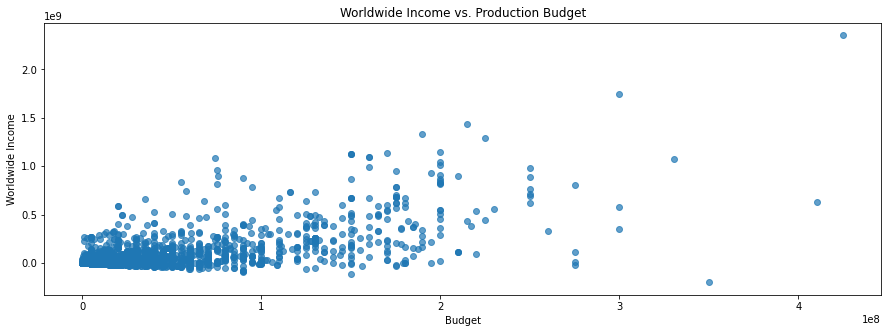

In [150]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['production_budget'], merged_budget['worldwide_income'], alpha = .7)
ax.set_title('Worldwide Income vs. Production Budget')
ax.set_xlabel('Budget')
ax.set_ylabel('Worldwide Income')

Text(0, 0.5, 'Worldwide Income')

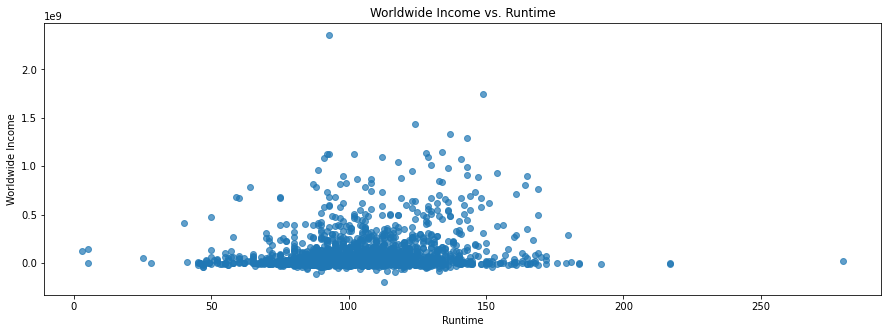

In [158]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['runtime_minutes'], merged_budget['worldwide_income'], alpha = .7)
ax.set_title('Worldwide Income vs. Runtime')
ax.set_xlabel('Runtime')
ax.set_ylabel('Worldwide Income')

#runtime 80 - 150 highest income

Text(0, 0.5, 'Rating')

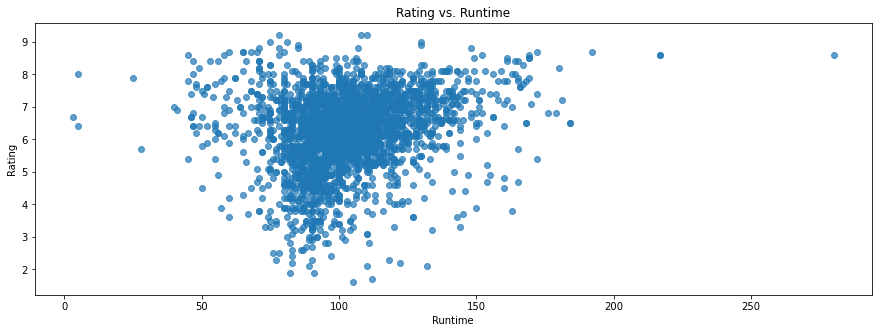

In [159]:
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(merged_budget['runtime_minutes'], merged_budget['averagerating'], alpha = .7)
ax.set_title('Rating vs. Runtime')
ax.set_xlabel('Runtime')
ax.set_ylabel('Rating')

#runtime 80 - 150 = ratings > 5, although movies with longer runtime tended to have higher rating (although not indicative of higher income)

SPLIT GENRE DEMO

In [161]:
merged_budget['genres'].value_counts()

Drama                              286
Documentary                        118
Comedy                              99
Comedy,Drama                        91
Comedy,Drama,Romance                75
Drama,Romance                       74
Adventure,Animation,Comedy          73
Horror                              59
Action,Adventure,Sci-Fi             58
Comedy,Romance                      58
Action,Crime,Drama                  56
Drama,Thriller                      52
Horror,Thriller                     50
Horror,Mystery,Thriller             45
Action,Adventure,Fantasy            40
Crime,Drama,Thriller                37
Action,Adventure,Drama              34
Action,Comedy,Crime                 34
Thriller                            34
Crime,Drama                         32
Action,Adventure,Comedy             30
Action,Crime,Thriller               29
Action,Thriller                     27
Biography,Drama,History             27
Action,Drama,Thriller               25
Drama,Mystery,Thriller   

In [162]:
merged_budget.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,-32763162,96861183


In [38]:
#create column for each genre
merged_budget[['G1', 'G2', 'G3']] = merged_budget['genres'].str.split(',', expand=True)

merged_budget.head()

    

#for each new col, iterate through orig genres...if col genre in orig genres, return true, else false -> EASY


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income,G1,G2,G3
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,Action,Animation,Comedy
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,Adventure,Drama,Romance
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,Drama,None,None
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,Drama,None,None
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,-32763162,96861183,Adventure,Comedy,Drama


CREATE COPY FIRST NEXT TIME BEFORE TRYING THIS

In [39]:
#iterate thru each column, adding unique values to a list
column_titles = []

for col_num in range(1, 4):
  for value in merged_budget['G{}'.format(col_num)]:
    if value in column_titles:
        continue
    else:
        column_titles.append(value)
        
column_titles

# print(column_titles)
# print(len(column_titles))

# merged_budget[title[0]] = ''


#iterate over list, adding columns from list into the df

#iterate over each column, checking for value in G1,G2,G3...if it's present, if it is, mark True

['Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Horror',
 'Biography',
 'Documentary',
 'Sci-Fi',
 'Crime',
 'Animation',
 'Fantasy',
 'Mystery',
 'Romance',
 'Thriller',
 'Musical',
 'Family',
 'Music',
 'Sport',
 'Western',
 'War',
 None,
 'History',
 'News']

In [225]:
merged_budget.drop(column_titles, axis=1)
# merged_budget.columns

merged_budget.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,...,Thriller,Musical,Family,Music,Sport,Western,War,NaN,History,News
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",...,,,,,,,,,,
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",...,,,,,,,,,,
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",...,,,,,,,,,,
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",...,,,,,,,,,,
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",...,,,,,,,,,,


In [ ]:
#REVISIT COVENTIONAL DF FILTERING

for title in column_titles:
#     merged_budget[title] = False
  value_list = []
    for value in merged_budget['genres']:
#      print('value', value, type(value))
#      print('title', title, type(title))
      if title in value:
        value_list.append(1)
      else:
        value_list.append(0)
            
    
        
        
        #         if (title == merged_budget['G1']) | (title == merged_budget['G2']) | (title == merged_budget['G3']):
#             value = True
#         else:
#             value = False

#         if title in [merged_budget['G1'], merged_budget['G2'], merged_budget['G3']]:
            
#         if title == merged_budget['G1']:
#             value = True
#         elif title == merged_budget['G2']:
#             value = True
#         elif title == merged_budget['G3']:
#             value = True
#         else:
#             value = False

#           if merged_budget[(merged_budget['G1'] == title) | (merged_budget['G2'] == title) | (merged_budget['G2'] == title)]:
#               value = True
          
            
    

In [ ]:
print(value_list)

In [1]:
# merged_budget.drop(column_titles, axis=1)
merged_budget.head()



NameError: name 'merged_budget' is not defined

SPLIT GENRE DEMO #2
- Goal: Be able to graph income for different genres / Be able to take aggregate info for different genres

In [36]:
merged_budget.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,-32763162,96861183


In [62]:
merged_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 0 to 2751
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2752 non-null   object 
 1   primary_title      2752 non-null   object 
 2   original_title     2752 non-null   object 
 3   start_year         2752 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2752 non-null   object 
 6   averagerating      2752 non-null   float64
 7   numvotes           2752 non-null   int64  
 8   id                 2752 non-null   int64  
 9   release_date       2752 non-null   object 
 10  movie              2752 non-null   object 
 11  production_budget  2752 non-null   int64  
 12  domestic_gross     2752 non-null   int64  
 13  worldwide_gross    2752 non-null   int64  
 14  domestic_income    2752 non-null   int64  
 15  worldwide_income   2752 non-null   int64  
 16  G1                 2752 

In [45]:
#Create dfs filtered for each genre
#Check their lengths and descriptive stats for income etc.

q_genre_dict = {}
df_genre_dict = {}

for title in column_titles:
    q_genre_dict['q_{}'.format(title)] = """
    SELECT
      primary_title
      runtime_minutes
      genres
      averagerating
      numvotes
      production_budget
      worldwide_gross
      worldwide_income
    FROM merged_budget
    WHERE genres LIKE '%{}%'.format(title) 
    """
    df_genre_dict['{}_df'.format(title)] = pysqldf('q_{}'.format(title))

PandaSQLException: (sqlite3.OperationalError) near "q_Action": syntax error
[SQL: q_Action]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [58]:
df_genre_dict = {}

for title in column_titles:
  mask = merged_budget['genres'].str.contains(pat = str(title), case=False, na=False)
  df_genre_dict['{}_df'.format(title)] = merged_budget[mask].copy()
    
df_genre_dict.keys()
    

dict_keys(['Action_df', 'Adventure_df', 'Drama_df', 'Comedy_df', 'Horror_df', 'Biography_df', 'Documentary_df', 'Sci-Fi_df', 'Crime_df', 'Animation_df', 'Fantasy_df', 'Mystery_df', 'Romance_df', 'Thriller_df', 'Musical_df', 'Family_df', 'Music_df', 'Sport_df', 'Western_df', 'War_df', 'None_df', 'History_df', 'News_df'])

In [85]:
df_genre_dict['Action_df']

# type(df_genre_dict['Action_df'])

name_list = []
mean_list = []
max_list = []

for df_key, df_value in df_genre_dict.items():
    name_list.append(df_key)
    mean_list.append(df_value['worldwide_income'].mean())
    max_list.append(df_value['worldwide_income'].max())
    
    genre_desc_df = pd.DataFrame({'name': name_list, 'mean_winc': mean_list, 'max_winc': max_list})
#     print(df_key, df_value['worldwide_income'].mean())

genre_desc_df

,name,mean_winc,max_winc
0,Action_df,1.277744e+08,1.748134e+09
1,Adventure_df,2.059963e+08,1.748134e+09
2,Drama_df,3.806185e+07,1.122470e+09
3,Comedy_df,7.415582e+07,1.122470e+09
4,Horror_df,4.676660e+07,2.351345e+09
5,Biography_df,4.685618e+07,8.399853e+08
6,Documentary_df,3.589637e+07,6.792360e+08
7,Sci-Fi_df,1.789648e+08,1.748134e+09
8,Crime_df,3.870504e+07,1.328723e+09
9,Animation_df,2.347626e+08,1.122470e+09


In [87]:
genre_desc_df.sort_values(by='mean_winc', ascending=False)

#next, let's graph these by worldwide inc

,name,mean_winc,max_winc
9,Animation_df,2.347626e+08,1.122470e+09
1,Adventure_df,2.059963e+08,1.748134e+09
7,Sci-Fi_df,1.789648e+08,1.748134e+09
10,Fantasy_df,1.480807e+08,1.122470e+09
14,Musical_df,1.374225e+08,1.099200e+09
0,Action_df,1.277744e+08,1.748134e+09
15,Family_df,1.135383e+08,1.099200e+09
3,Comedy_df,7.415582e+07,1.122470e+09
16,Music_df,6.929897e+07,1.099200e+09
17,Sport_df,5.482649e+07,1.122470e+09


split, 

In [89]:
test_df = merged_budget.copy()

In [90]:
test_df['genres'] = test_df['genres'].str.split(',')
test_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income,G1,G2,G3
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"[Action, Animation, Comedy]",1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,Action,Animation,Comedy
1,tt0337692,On the Road,On the Road,2012,124.0,"[Adventure, Drama, Romance]",6.1,37886,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,Adventure,Drama,Romance
2,tt4339118,On the Road,On the Road,2014,89.0,[Drama],6.0,6,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,Drama,None,None
3,tt5647250,On the Road,On the Road,2016,121.0,[Drama],5.7,127,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,Drama,None,None
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",7.3,275300,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,-32763162,96861183,Adventure,Comedy,Drama


In [94]:
test_df = test_df.explode('genres')

In [132]:
test_df.groupby('genres', as_index=False).count().sort_values('movie_id', ascending = False)

,genres,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income,G1,G2,G3
7,Drama,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1153,788
4,Comedy,742,742,742,742,742,742,742,742,742,742,742,742,742,742,742,742,643,434
0,Action,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,599,538
19,Thriller,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493,493,459,307
1,Adventure,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,444,439,416
5,Crime,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,359,357,297
11,Horror,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354,295,214
16,Romance,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,317,312,179
14,Mystery,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,219,202
17,Sci-Fi,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,195,178


In [100]:
test_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income,G1,G2,G3
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Action,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,Action,Animation,Comedy
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Animation,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,Action,Animation,Comedy
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,Comedy,1.9,8248,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,-45000000,-44926294,Action,Animation,Comedy
1,tt0337692,On the Road,On the Road,2012,124.0,Adventure,6.1,37886,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,Adventure,Drama,Romance
1,tt0337692,On the Road,On the Road,2012,124.0,Drama,6.1,37886,17,"Mar 22, 2013",On the Road,25000000,720828,9313302,-24279172,-15686698,Adventure,Drama,Romance


In [113]:
test_df.groupby('genres', as_index=False).mean().sort_values('worldwide_income', ascending=False).head()

#####CREATE VISUALIZATION (BAR GRAPH) OF INCOMES######

,genres,start_year,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income
2,Animation,2014.133858,93.196850,6.498425,102282.346457,46.834646,8.679362e+07,1.173423e+08,3.215562e+08,3.054870e+07,2.347626e+08
1,Adventure,2014.238739,108.925676,6.391441,169571.862613,48.959459,9.158111e+07,1.064022e+08,2.975774e+08,1.482112e+07,2.059963e+08
17,Sci-Fi,2014.305000,108.785000,6.155500,201684.600000,51.985000,7.100522e+07,9.272728e+07,2.499700e+08,2.172206e+07,1.789648e+08
9,Fantasy,2013.784884,108.465116,6.008721,119096.232558,50.354651,7.007436e+07,7.876512e+07,2.181551e+08,8.690764e+06,1.480807e+08
13,Musical,2013.523810,108.095238,6.404762,41280.380952,51.190476,3.819048e+07,7.599518e+07,1.756130e+08,3.780470e+07,1.374225e+08


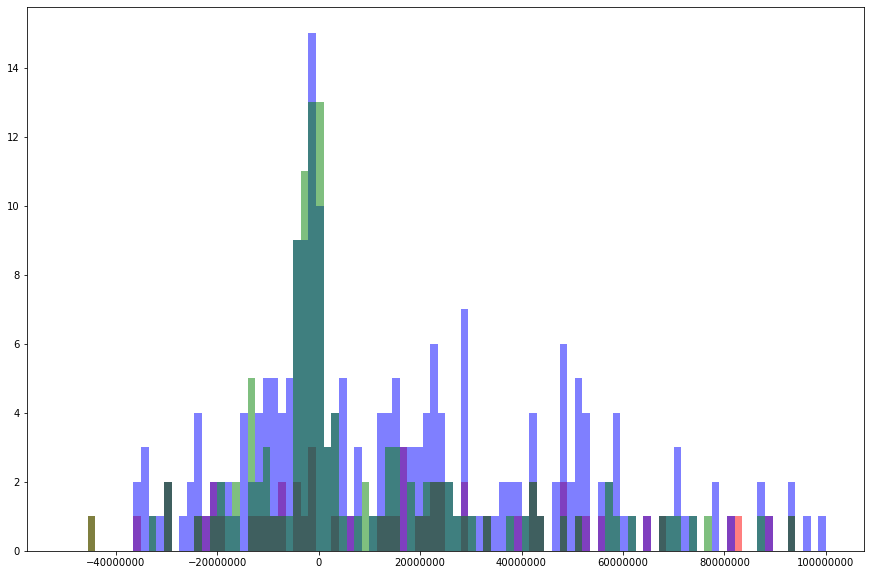

In [130]:
animation_df = test_df[test_df['genres']=='Animation']
adventure_df = test_df[test_df['genres']=='Adventure']
scifi_df = test_df[test_df['genres'] =='Sci-Fi']

fig, ax = plt.subplots(figsize=(15, 10))

ax.hist(x = animation_df['worldwide_income'], bins = 100, alpha = .5, color = 'red', range = (-50000000, 100000000));
ax.hist(x = adventure_df['worldwide_income'], bins = 100, alpha = .5, color = 'blue', range = (-50000000, 100000000));
ax.hist(x = scifi_df['worldwide_income'], bins = 100, alpha = .5, color = 'green', range = (-50000000, 100000000));
plt.ticklabel_format(style='plain')

#not a great graph...do bar graph of income by all movie types...note that movie quantity varies in each category
#if you sort 


In [134]:
test_df.groupby('genres', as_index=False).mean().sort_values('averagerating', ascending=False)
#doesn't exactly fall earnings but all do fall in range that yields higher values

#follow this with a few analyses in SQL table to understand if larger dataset impacts things

,genres,start_year,runtime_minutes,averagerating,numvotes,id,production_budget,domestic_gross,worldwide_gross,domestic_income,worldwide_income
6,Documentary,2013.984694,81.204082,7.132653,2287.229592,47.250000,2.253645e+07,2.968135e+07,5.843281e+07,7.144900e+06,3.589637e+07
3,Biography,2014.492308,111.897436,6.971795,80511.994872,52.215385,2.545666e+07,3.469678e+07,7.231284e+07,9.240125e+06,4.685618e+07
10,History,2014.450704,115.309859,6.829577,62827.436620,48.464789,3.119592e+07,3.344521e+07,7.038875e+07,2.249297e+06,3.919284e+07
15,News,2013.333333,68.666667,6.800000,20.333333,41.000000,1.660000e+07,9.403741e+06,3.668208e+07,-7.196259e+06,2.008208e+07
18,Sport,2013.885246,109.459016,6.581967,42651.934426,55.065574,2.420697e+07,4.023151e+07,7.903346e+07,1.602454e+07,5.482649e+07
2,Animation,2014.133858,93.196850,6.498425,102282.346457,46.834646,8.679362e+07,1.173423e+08,3.215562e+08,3.054870e+07,2.347626e+08
12,Music,2013.694444,104.972222,6.483333,50035.430556,58.763889,1.509611e+07,2.976049e+07,6.285071e+07,1.466438e+07,4.775460e+07
20,War,2014.025641,114.871795,6.438462,37215.589744,49.974359,2.310256e+07,1.967408e+07,4.257518e+07,-3.428482e+06,1.947261e+07
7,Drama,2013.879778,107.102154,6.436692,56266.991661,51.129256,2.370732e+07,2.908992e+07,6.176916e+07,5.382601e+06,3.806185e+07
13,Musical,2013.523810,108.095238,6.404762,41280.380952,51.190476,3.819048e+07,7.599518e+07,1.756130e+08,3.780470e+07,1.374225e+08


In [137]:
print(len(movie_budget_df))
print(len(merged_budget))

5782
2752


In [139]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***